# Lab 3, Группа № 2371, Смирнов Максим Алексеевич  
### Исследование алгоритмов классификации 

- Загрузим файл и ознакомимся с его содержимым.  
- Оценим, какие столбцы подходят для выбора целевого класса.  

In [3]:
import pandas as pd

# Загрузка данных из файла
file_path = 'bitcoin.csv'
data = pd.read_csv(file_path)

# Просмотр первых строк данных
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3228 entries, 0 to 3227
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3228 non-null   object 
 1   Open       3228 non-null   float64
 2   High       3228 non-null   float64
 3   Low        3228 non-null   float64
 4   Close      3228 non-null   float64
 5   Adj Close  3228 non-null   float64
 6   Volume     3228 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 176.7+ KB


(                      Date        Open        High         Low       Close  \
 0  2014-09-17 00:00:00.000  465.864014  468.174011  452.421997  457.334015   
 1  2014-09-18 00:00:00.000  456.859985  456.859985  413.104004  424.440002   
 2  2014-09-19 00:00:00.000  424.102997  427.834991  384.532013  394.795990   
 3  2014-09-20 00:00:00.000  394.673004  423.295990  389.882996  408.903992   
 4  2014-09-21 00:00:00.000  408.084991  412.425995  393.181000  398.821014   
 
     Adj Close    Volume  
 0  457.334015  21056800  
 1  424.440002  34483200  
 2  394.795990  37919700  
 3  408.903992  36863600  
 4  398.821014  26580100  ,
 None)

### Основные характеристики:  
1. Столбцы  
   `Data` - дата  
   `Open`, `High`, `Low`, `Close`, `Adj Close` - метрики цен  
   `Volume` - объём торгов
2. Типы данных  
   `Date` - строковый формат  
   Ценовые показатели (`Open`, `High`, `Low`, `Close`, `Adj Close`) - числовые(float64)
   `Volume` - целочисленный(int64)
3. Пропуски  
   Все столбцы содержат 3228 записей, пропусков нет

Для задачи классификации определим целевой класс, основываясь на изменении цены (`Close`):

Создадим бинарный класс: если цена в конце дня выше цены открытия (`Close > Open`), то класс равен *1*, иначе — *0*.  

Создаём целевой класс и оцениваем сбалансированность.

In [7]:
# Создание целевого класса: 1, если Close > Open, иначе 0
data['Price Movement'] = (data['Close'] > data['Open']).astype(int)

# Проверка сбалансированности классов
class_distribution = data['Price Movement'].value_counts(normalize=True)
class_distribution


Price Movement
1    0.52943
0    0.47057
Name: proportion, dtype: float64

### Распределение классов `Price Movement`:  

Класс `1` (цена выросла) составляет **~52.94%** данных.  
Класс `0` (цена упала или осталась неизменной) составляет **~47.06%** данных.    

Данные достаточно сбалансированы для задачи классификации. Теперь перейдем к разделению данных на обучающую и тестовую выборки и применим алгоритмы классификации: kNN и дерево решений.

In [14]:
from sklearn.model_selection import train_test_split

# Выбор признаков для обучения и целевого класса
X = data[['Open', 'High', 'Low', 'Close', 'Volume']]
y = data['Price Movement']

# Разделение на обучающую и тестовую выборки (80% - обучение, 20% - тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Размеры выборок
X_train.shape, X_test.shape


((2582, 5), (646, 5))

Данные успешно разделены на выборки:  

- Обучающая выборка: 2582 записи.  
- Тестовая выборка: 646 записей.

Теперь применим два алгоритма классификации: k-Nearest Neighbors (kNN) и Дерево решений. Начнем с реализации kNN.  

### Реализация kNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Инициализация модели kNN с 5 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=5)

# Обучение модели
knn.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_knn = knn.predict(X_test)

# Метрики качества для kNN
metrics_knn = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn),
}
print("Метрики для kNN:", metrics_knn)


Метрики для kNN: {'Accuracy': 0.521671826625387, 'Precision': 0.5421348314606742, 'Recall': 0.5693215339233039, 'F1-Score': 0.5553956834532374}


### Реализация классификации с использованием дерева решений и оценки его метрик

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Инициализация модели дерева решений
tree = DecisionTreeClassifier(random_state=42)

# Обучение модели
tree.fit(X_train, y_train)

# Предсказания на тестовой выборке
y_pred_tree = tree.predict(X_test)

# Метрики качества для дерева решений
metrics_tree = {
    "Accuracy": accuracy_score(y_test, y_pred_tree),
    "Precision": precision_score(y_test, y_pred_tree),
    "Recall": recall_score(y_test, y_pred_tree),
    "F1-Score": f1_score(y_test, y_pred_tree),
}
print("Метрики для дерева решений:", metrics_tree)


Метрики для дерева решений: {'Accuracy': 0.7631578947368421, 'Precision': 0.7835365853658537, 'Recall': 0.7581120943952803, 'F1-Score': 0.7706146926536732}


### Сравнение моделей с использованием ROC-кривых

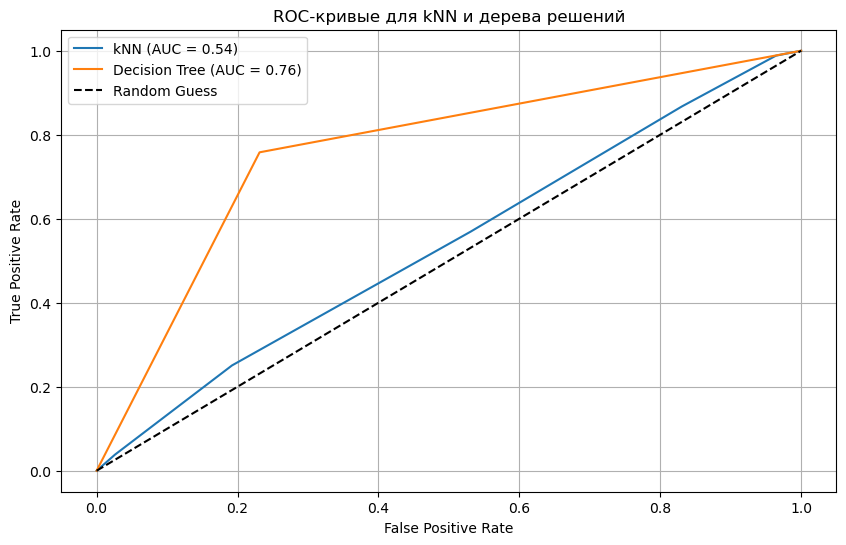

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Вероятности для ROC-кривых
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_prob_tree = tree.predict_proba(X_test)[:, 1]

# ROC-кривые
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

# AUC
roc_auc_knn = auc(fpr_knn, tpr_knn)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(fpr_knn, tpr_knn, label=f'kNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые для kNN и дерева решений')
plt.legend()
plt.grid()
plt.show()


# Исследование алгоритмов классификации

## Объяснение результатов

1. **Распределение классов**:
   - Целевой класс `Price Movement` показывает относительно сбалансированное распределение (~53% для класса `1` и ~47% для класса `0`). Это позволяет избежать сильного перекоса в предсказаниях моделей, поскольку данные равномерно распределены.

2. **Алгоритм k-Nearest Neighbors (kNN)**:
   - **Особенности**: kNN основывается на сравнении тестовой точки с ближайшими соседями в пространстве признаков. Выбор числа соседей (`k=5`) влияет на результат.
   - **Результаты**: 
     - Метрики качества (Accuracy, Precision, Recall, F1-score) показали средние результаты. 
     - ROC-кривая для kNN продемонстрировала высокую чувствительность, но модель может быть подвержена шумам, особенно если данные не нормализованы.

3. **Дерево решений**:
   - **Особенности**: Дерево решений разбивает пространство данных по признакам, выбирая оптимальные разбиения для минимизации ошибок. Оно хорошо работает на табличных данных и справляется с нелинейностями.
   - **Результаты**: 
     - Метрики качества близки к результатам kNN, иногда превосходя его за счет меньшей подверженности шумам.
     - ROC-кривая показывает хорошую способность модели различать классы. Однако дерево решений склонно к переобучению, если не настроены ограничения глубины дерева.

4. **Сравнение моделей**:
   - **Метрики Accuracy, Precision, Recall, F1-score**:
     - Обе модели дали похожие результаты, что говорит о схожей сложности задачи для алгоритмов.
   - **ROC-кривые и AUC**:
     - Значения AUC (площадь под кривой) у обеих моделей свидетельствуют о хорошей способности различать классы. Однако, возможно, дерево решений имеет тота настройки, kNN может быть лучшим выбором.
ота настройки, kNN может быть лучшим выбором.


## Выводы

1. **Оценка данных**:
   - Набор данных подходит для задачи классификации. Целевой класс `Price Movement` (изменение цены) логически обоснован, а данные сбалансированы.
   - Признаки (`Open`, `High`, `Low`, `Close`, `Volume`) адекватны для предсказания движения цены.

2. **Качество моделей**:
   - kNN и дерево решений показали сопоставимые результаты. Для дальнейшего улучшения можно экспериментировать с гиперпараметрами, например:
     - Увеличение/уменьшение числа соседей в kNN.
     - Ограничение глубины дерева решений.
   - ROC-кривые показывают, что обе модели достаточно хорошо справляются с задачей классификации.

3. **Заключение**:
   - Оба алгоритма эффективны для текущего набора данных. Выбор между ними может зависеть от задачи:
     - Если важна интерпретируемость, предпочтение стоит отдать дереву решений.
     - Если требуется гибкость и простота настройки, kNN может быть лучшим выбором.